In [20]:
setwd('.')
house_prices <- read.csv(file = 'train.csv')

In [21]:
library(psych)
library(corrplot)

In [22]:
colnames(house_prices)

[1] "Id"            "MSSubClass"    "MSZoning"      "LotFrontage"  
 [5] "LotArea"       "Street"        "Alley"         "LotShape"     
 [9] "LandContour"   "Utilities"     "LotConfig"     "LandSlope"    
[13] "Neighborhood"  "Condition1"    "Condition2"    "BldgType"     
[17] "HouseStyle"    "OverallQual"   "OverallCond"   "YearBuilt"    
[21] "YearRemodAdd"  "RoofStyle"     "RoofMatl"      "Exterior1st"  
[25] "Exterior2nd"   "MasVnrType"    "MasVnrArea"    "ExterQual"    
[29] "ExterCond"     "Foundation"    "BsmtQual"      "BsmtCond"     
[33] "BsmtExposure"  "BsmtFinType1"  "BsmtFinSF1"    "BsmtFinType2" 
[37] "BsmtFinSF2"    "BsmtUnfSF"     "TotalBsmtSF"   "Heating"      
[41] "HeatingQC"     "CentralAir"    "Electrical"    "X1stFlrSF"    
[45] "X2ndFlrSF"     "LowQualFinSF"  "GrLivArea"     "BsmtFullBath" 
[49] "BsmtHalfBath"  "FullBath"      "HalfBath"      "BedroomAbvGr" 
[53] "KitchenAbvGr"  "KitchenQual"   "TotRmsAbvGrd"  "Functional"   
[57] "Fireplaces"    "FireplaceQu"   "GarageType"    "GarageYrBlt"  
[61] "GarageFinish"  "GarageCars"    "GarageArea"    "GarageQual"   
[65] "GarageCond"    "PavedDrive"    "WoodDeckSF"    "OpenPorchSF"  
[69] "EnclosedPorch" "X3SsnPorch"    "ScreenPorch"   "PoolArea"     
[73] "PoolQC"        "Fence"         "MiscFeature"   "MiscVal"      
[77] "MoSold"        "YrSold"        "SaleType"      "SaleCondition"
[81] "SalePrice"

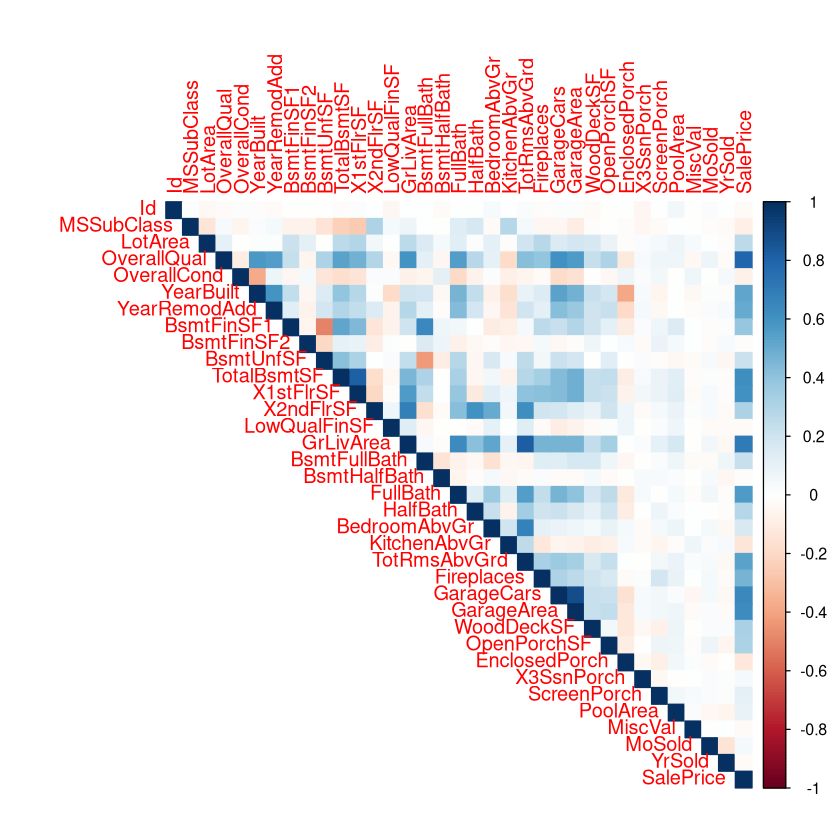

In [23]:
nums <- unlist(lapply(house_prices, is.numeric))
house_prices_nums = house_prices[,nums]

corr= cor(house_prices_nums[,c(-3,-9,-26)])
# corr= cor(house_prices_nums)
corrplot(corr, method="color", type='upper')

In [24]:
house_prices_ncol = ncol(house_prices_nums)
obj_field = which(colnames(house_prices_nums)=="SalePrice")
house_prices_ncol

[1] 38

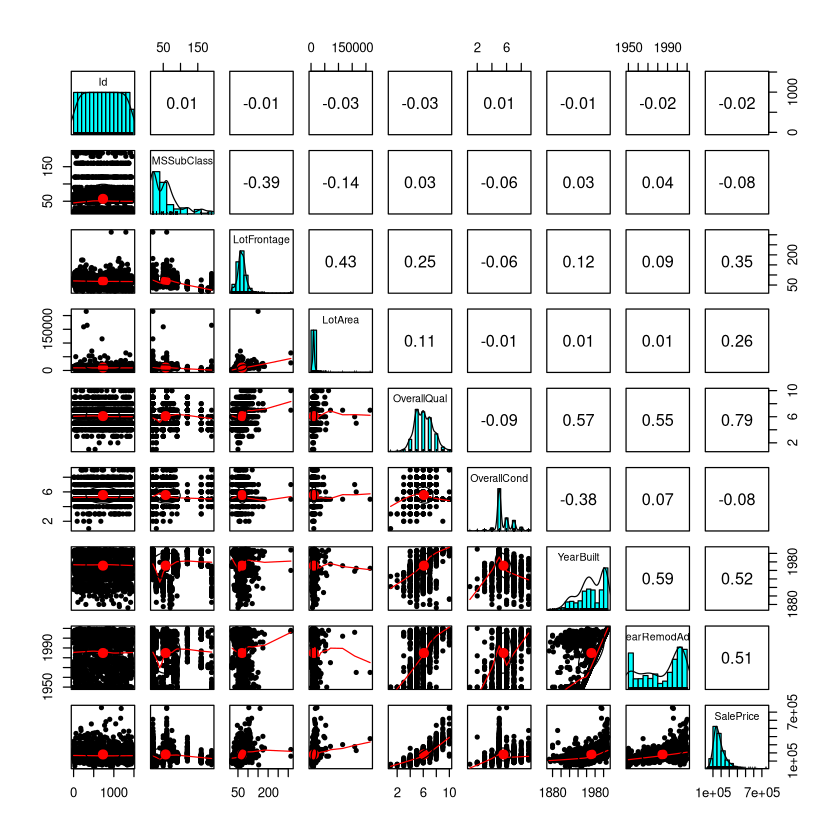

In [25]:
pairs.panels(house_prices_nums[,c(1:8,obj_field)],
            method="pearson",
            density=TRUE,
            ellipses=TRUE
            )

In [26]:
sale_corr <- abs(corr[,'SalePrice'])
sort(sale_corr, decreasing = TRUE)

SalePrice   OverallQual     GrLivArea    GarageCars    GarageArea 
   1.00000000    0.79098160    0.70862448    0.64040920    0.62343144 
  TotalBsmtSF     X1stFlrSF      FullBath  TotRmsAbvGrd     YearBuilt 
   0.61358055    0.60585218    0.56066376    0.53372316    0.52289733 
 YearRemodAdd    Fireplaces    BsmtFinSF1    WoodDeckSF     X2ndFlrSF 
   0.50710097    0.46692884    0.38641981    0.32441344    0.31933380 
  OpenPorchSF      HalfBath       LotArea  BsmtFullBath     BsmtUnfSF 
   0.31585623    0.28410768    0.26384335    0.22712223    0.21447911 
 BedroomAbvGr  KitchenAbvGr EnclosedPorch   ScreenPorch      PoolArea 
   0.16821315    0.13590737    0.12857796    0.11144657    0.09240355 
   MSSubClass   OverallCond        MoSold    X3SsnPorch        YrSold 
   0.08428414    0.07785589    0.04643225    0.04458367    0.02892259 
 LowQualFinSF            Id       MiscVal  BsmtHalfBath    BsmtFinSF2 
   0.02560613    0.02191672    0.02118958    0.01684415    0.01137812

In [27]:
library(FactoMineR)
library(factoextra)

In [28]:
prices_pca <- PCA(house_prices_nums)

Warning message in PCA(house_prices_nums):
“Missing values are imputed by the mean of the variable: you should use the imputePCA function of the missMDA package”

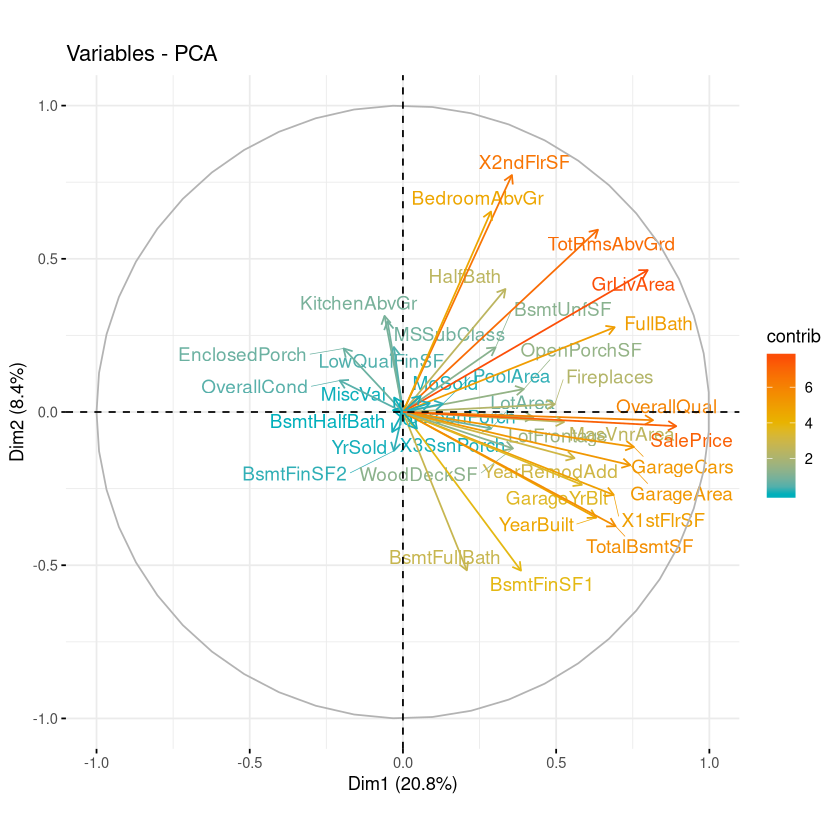

In [32]:
fviz_pca_var(prices_pca, col.var="contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping
             )